<a href="https://colab.research.google.com/github/samdandy/ai-ml-course-proj-2/blob/main/AIML_ML_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a mid-sized, fast-growing US-based financial institution that offers a range of retail banking services, including savings and checking accounts, fixed deposits, and personal loans. The bank’s business model is centered on building long-term customer relationships, expanding its retail footprint, and growing its loan portfolio to drive sustainable profitability through interest income.

It currently relies on a large base of liability customers (depositors) but faces a significant under-representation of asset customers (borrowers). To drive profitability through interest income, the bank must aggressively expand its loan portfolio by converting existing depositors into personal loan customers.

Last year’s pilot campaign achieved a 9% conversion rate, validating the potential of this strategy. However, to optimize marketing spend and improve efficiency, the retail marketing department requires a more data-driven approach. Enhancing the success ratio of these campaigns is critical for sustainable growth and maximizing customer lifetime value.

### Objective

The objective is to develop a predictive classification model that identifies patterns and key factors driving personal loan adoption among existing liability customers. By uncovering the demographic and behavioral drivers of loan conversion, the goal is to enable targeted segmentation and more precise marketing interventions that improve campaign conversion rates, optimize marketing spend, and enhance overall profitability through higher-quality loan portfolio growth.

### Data Dictionary

* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [354]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set()
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [356]:
file_name = "Loan_Modelling.csv"
data = pd.read_csv(file_name)
loan_data = data.copy()

## Data Overview

* Observations
* Sanity checks

In [420]:
print(loan_data.head(10))

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   
5   37          13      29       4    0.4          2       155              0   
6   53          27      72       2    1.5          2         0              0   
7   50          24      22       1    0.3          3         0              0   
8   35          10      81       3    0.6          2       104              0   
9   34           9     180       1    8.9          3         0              1   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           

In [358]:
rows, cols = loan_data.shape
print(f"there are {rows} rows")
print(f"there are {cols} columns")

there are 5000 rows
there are 14 columns


In [359]:
print(loan_data.describe())

                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [360]:
null_loans = loan_data.isnull().sum()
na_loans = loan_data.isna().sum()
print(f"There are {loan_data.duplicated().sum()} dupes")
print(null_loans)
print(na_loans)
if 'ID' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ID'])
# data looks good to go

There are 0 dupes
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


## Exploratory Data Analysis.

EDA is a critical step in any data project used to investigate and understand the data before model construction.

The following questions serve as a starting point to help you approach the analysis and generate initial insights:

**Questions**:
1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their education?
5. How does a customer's interest in purchasing a loan vary with their age?

**[IMPORTANT]** Beyond the Basics: Please note that these are guiding questions only. To receive full points for this rubric section, you are expected to perform a thorough analysis that goes beyond these specific questions to uncover deeper trends and relationships within the data.

**Normal Distribution**

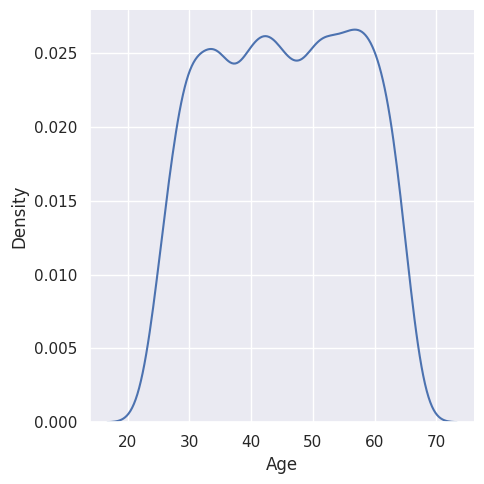

In [361]:
sns.displot(data=loan_data,x='Age',kind='kde')

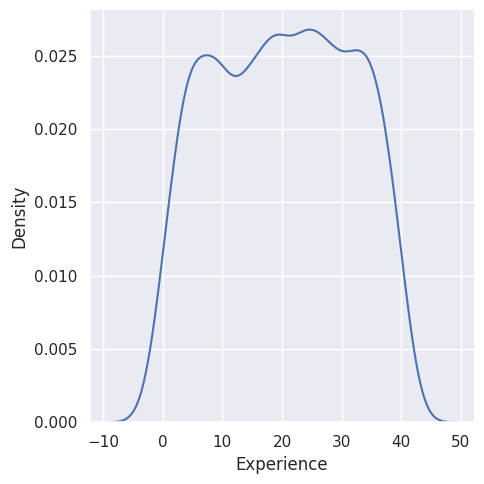

In [362]:
sns.displot(data=loan_data,x='Experience',kind='kde')

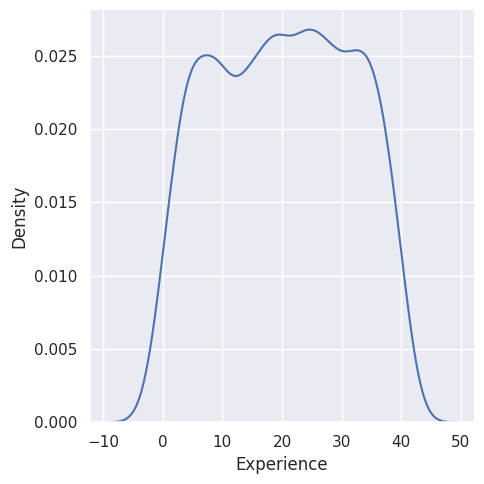

In [363]:
sns.displot(data=loan_data,x='Experience',kind='kde')

<Axes: xlabel='Education', ylabel='count'>

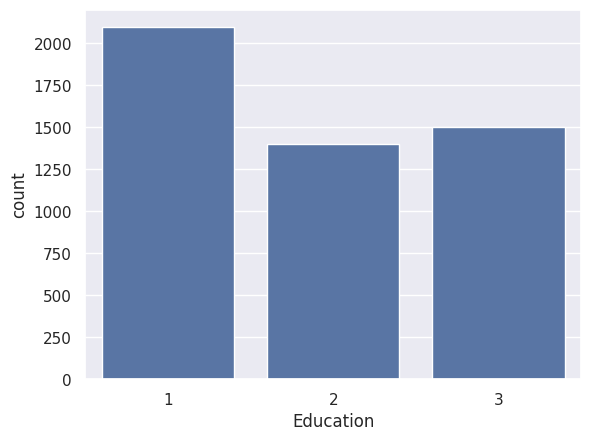

In [364]:
sns.countplot(data=loan_data,x='Education')

<Axes: xlabel='Family', ylabel='count'>

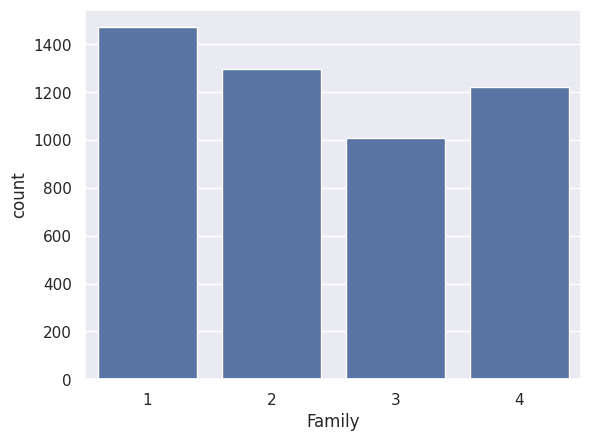

In [365]:
sns.countplot(data=loan_data,x='Family')

**Right Skewed Distribution**

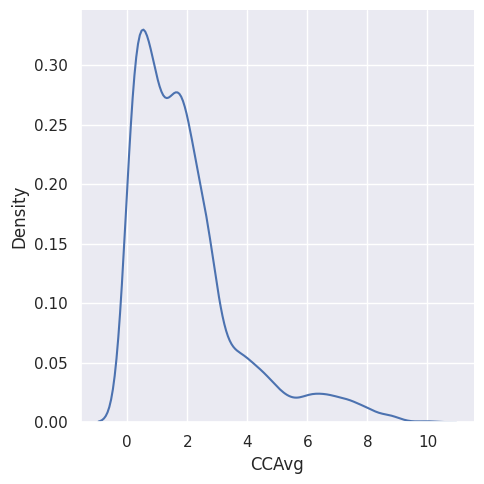

In [366]:
sns.displot(data=loan_data,x='CCAvg',kind='kde')

0.69% applicants do not have a mortgage


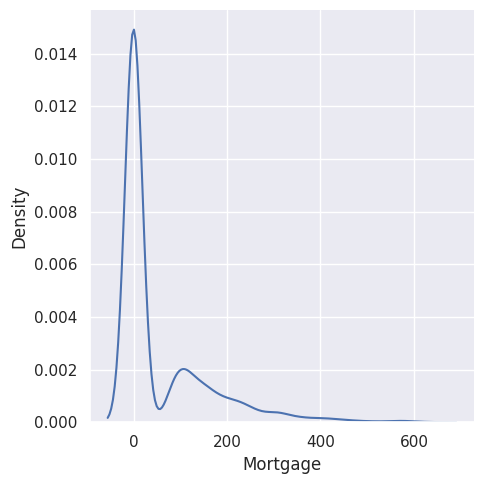

In [367]:
sns.displot(data=loan_data,x='Mortgage',kind='kde')
# Mortgage is right skewed distribution
no_mortgage_count = loan_data['Mortgage'].value_counts().get(0, 0)
perc_no_mortgage = no_mortgage_count / loan_data.shape[0]
print(f"{perc_no_mortgage.round(2)}% applicants do not have a mortgage")
# Most loan applicants do not have a mortgage

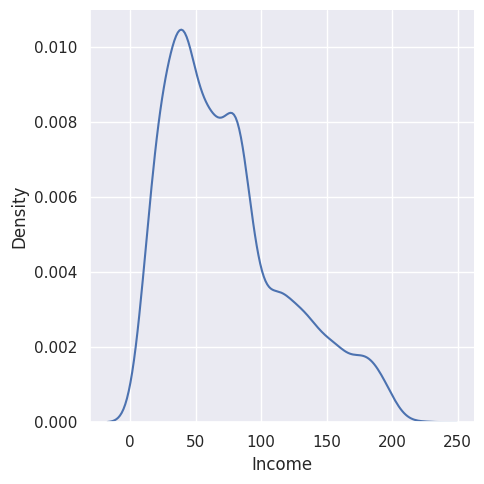

In [368]:
sns.displot(data=loan_data,x='Income',kind='kde')

In [369]:
has_cc_count = loan_data['CreditCard'].value_counts().get(1, 1)
print(f"{has_cc_count} customers have a credit card. {(has_cc_count/loan_data.shape[0]).round(2)}% of all customers")

1470 customers have a credit card. 0.29% of all customers


<Axes: >

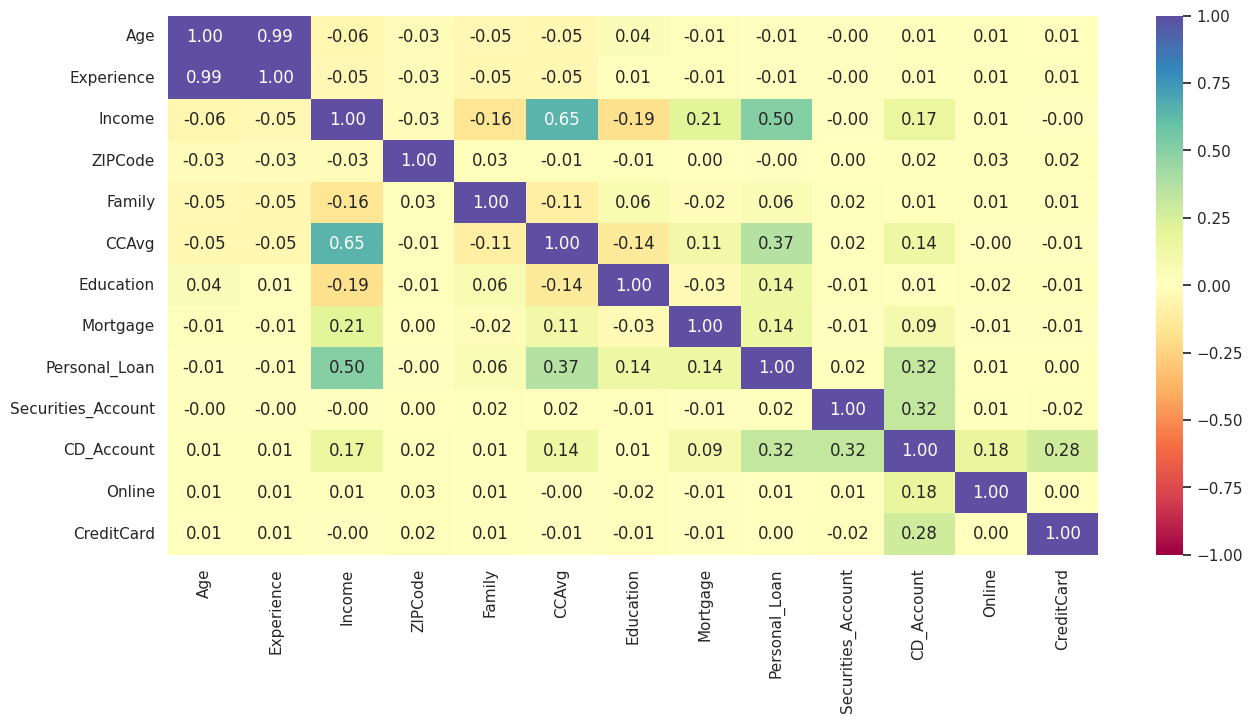

In [370]:
num_cols = loan_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    loan_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# Income and CCAvg have a positive correlation to Personal Loan


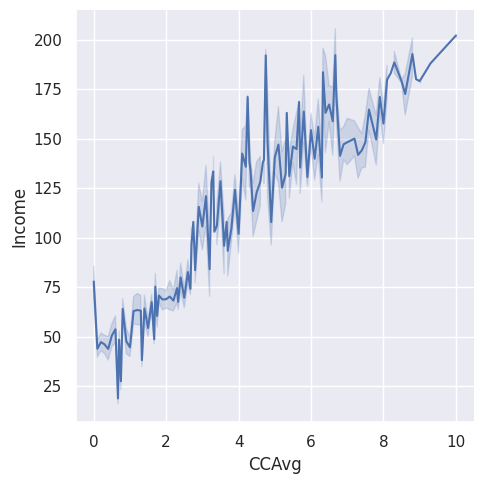

In [371]:
sns.relplot(data=loan_data,x="CCAvg",y="Income", kind="line")
# CC avg and income have a positive correlation with eachother.

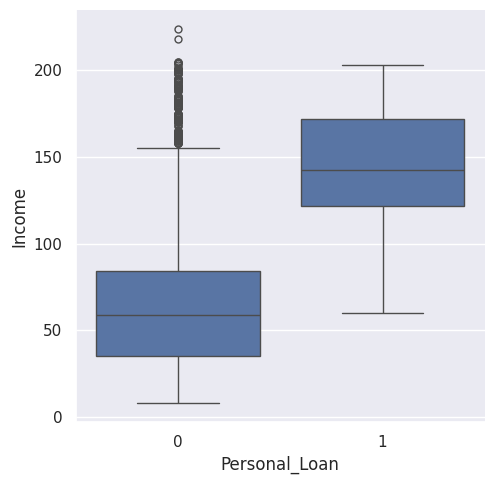

In [372]:
sns.catplot(data=loan_data, x="Personal_Loan", y="Income",  kind="box")
# Highest percentage of personal loans for higher income people

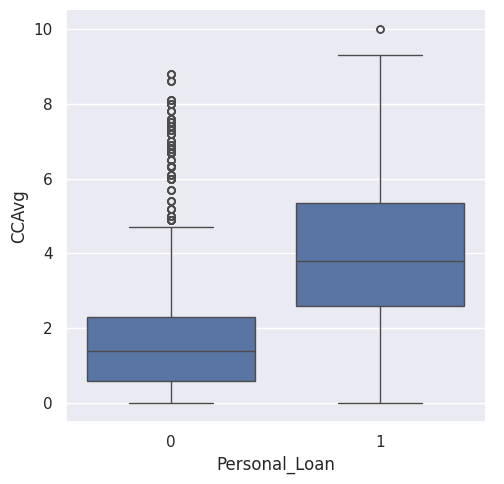

In [373]:
sns.catplot(data=loan_data, x="Personal_Loan", y="CCAvg",  kind="box")
# Highest percentage of personal loans for higher CCAvg people.

<Axes: xlabel='Education', ylabel='Count'>

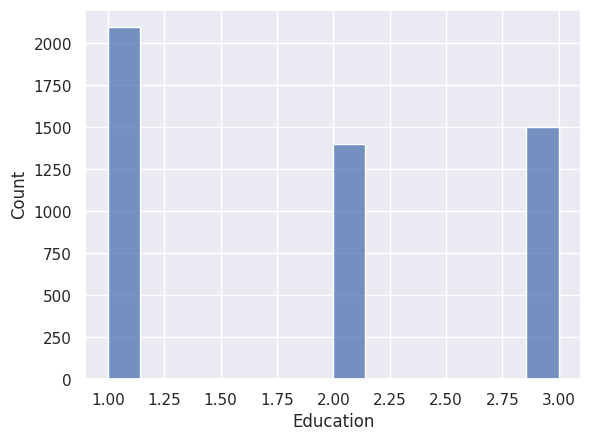

In [374]:
sns.histplot(data=loan_data,x="Education")
# More Undergrad loan customer, but Eduction is for the most part is evenly distributed for 2 and 3.
# It also the case that there is many more people with undergraduate education level in the world. Its tough to really correlate this to likelyhood of taking a loan.

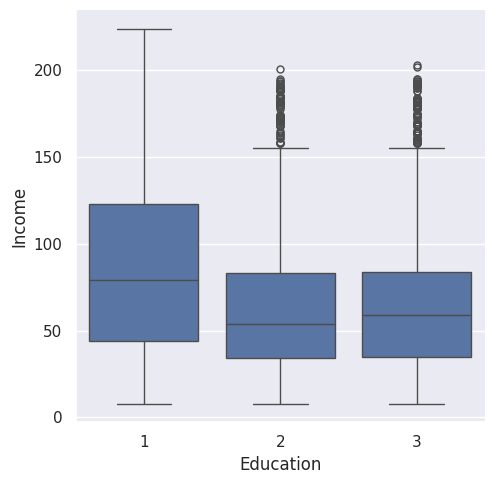

In [375]:
sns.catplot(data=loan_data, x="Education", y="Income",  kind="box")
# Higher education does not mean higher income.

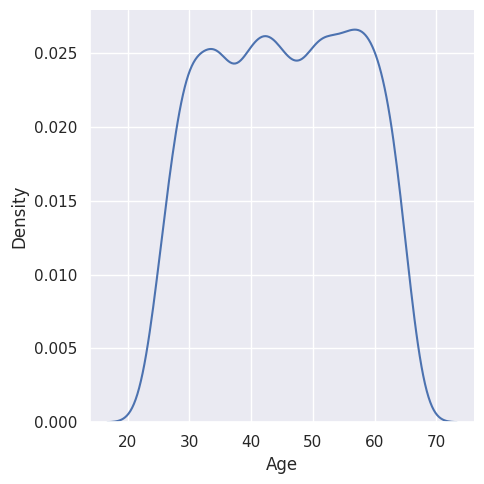

In [376]:
sns.displot(data=loan_data,x="Age",kind='kde')
# Most cutomers tend to be interested in loans between 30 and 55 and past 55 less customers are interested in a loan.

<Axes: xlabel='Age'>

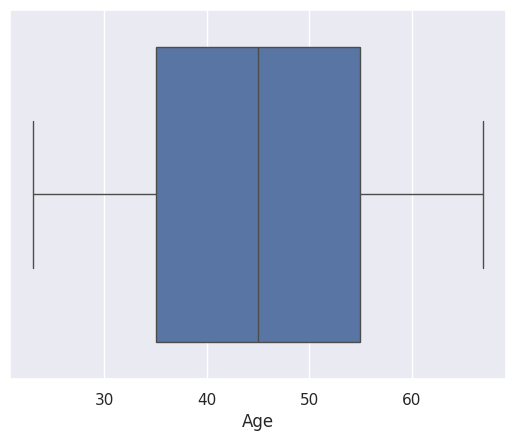

In [377]:
sns.boxplot(data=loan_data, x="Age")
# 50% of customers are between 35 and 55.


In [378]:
middle_aged = loan_data["Age"][(loan_data["Age"] >= 30) & (loan_data["Age"] <= 60)].count()
older = loan_data["Age"][loan_data["Age"] > 60].count()
print(f"{round(middle_aged/loan_data.shape[0],2)}% of loan applicants are middle aged")
print(f"{round(older/loan_data.shape[0],2)}% of loan applicants are older aged")


0.79% of loan applicants are middle aged
0.11% of loan applicants are older aged


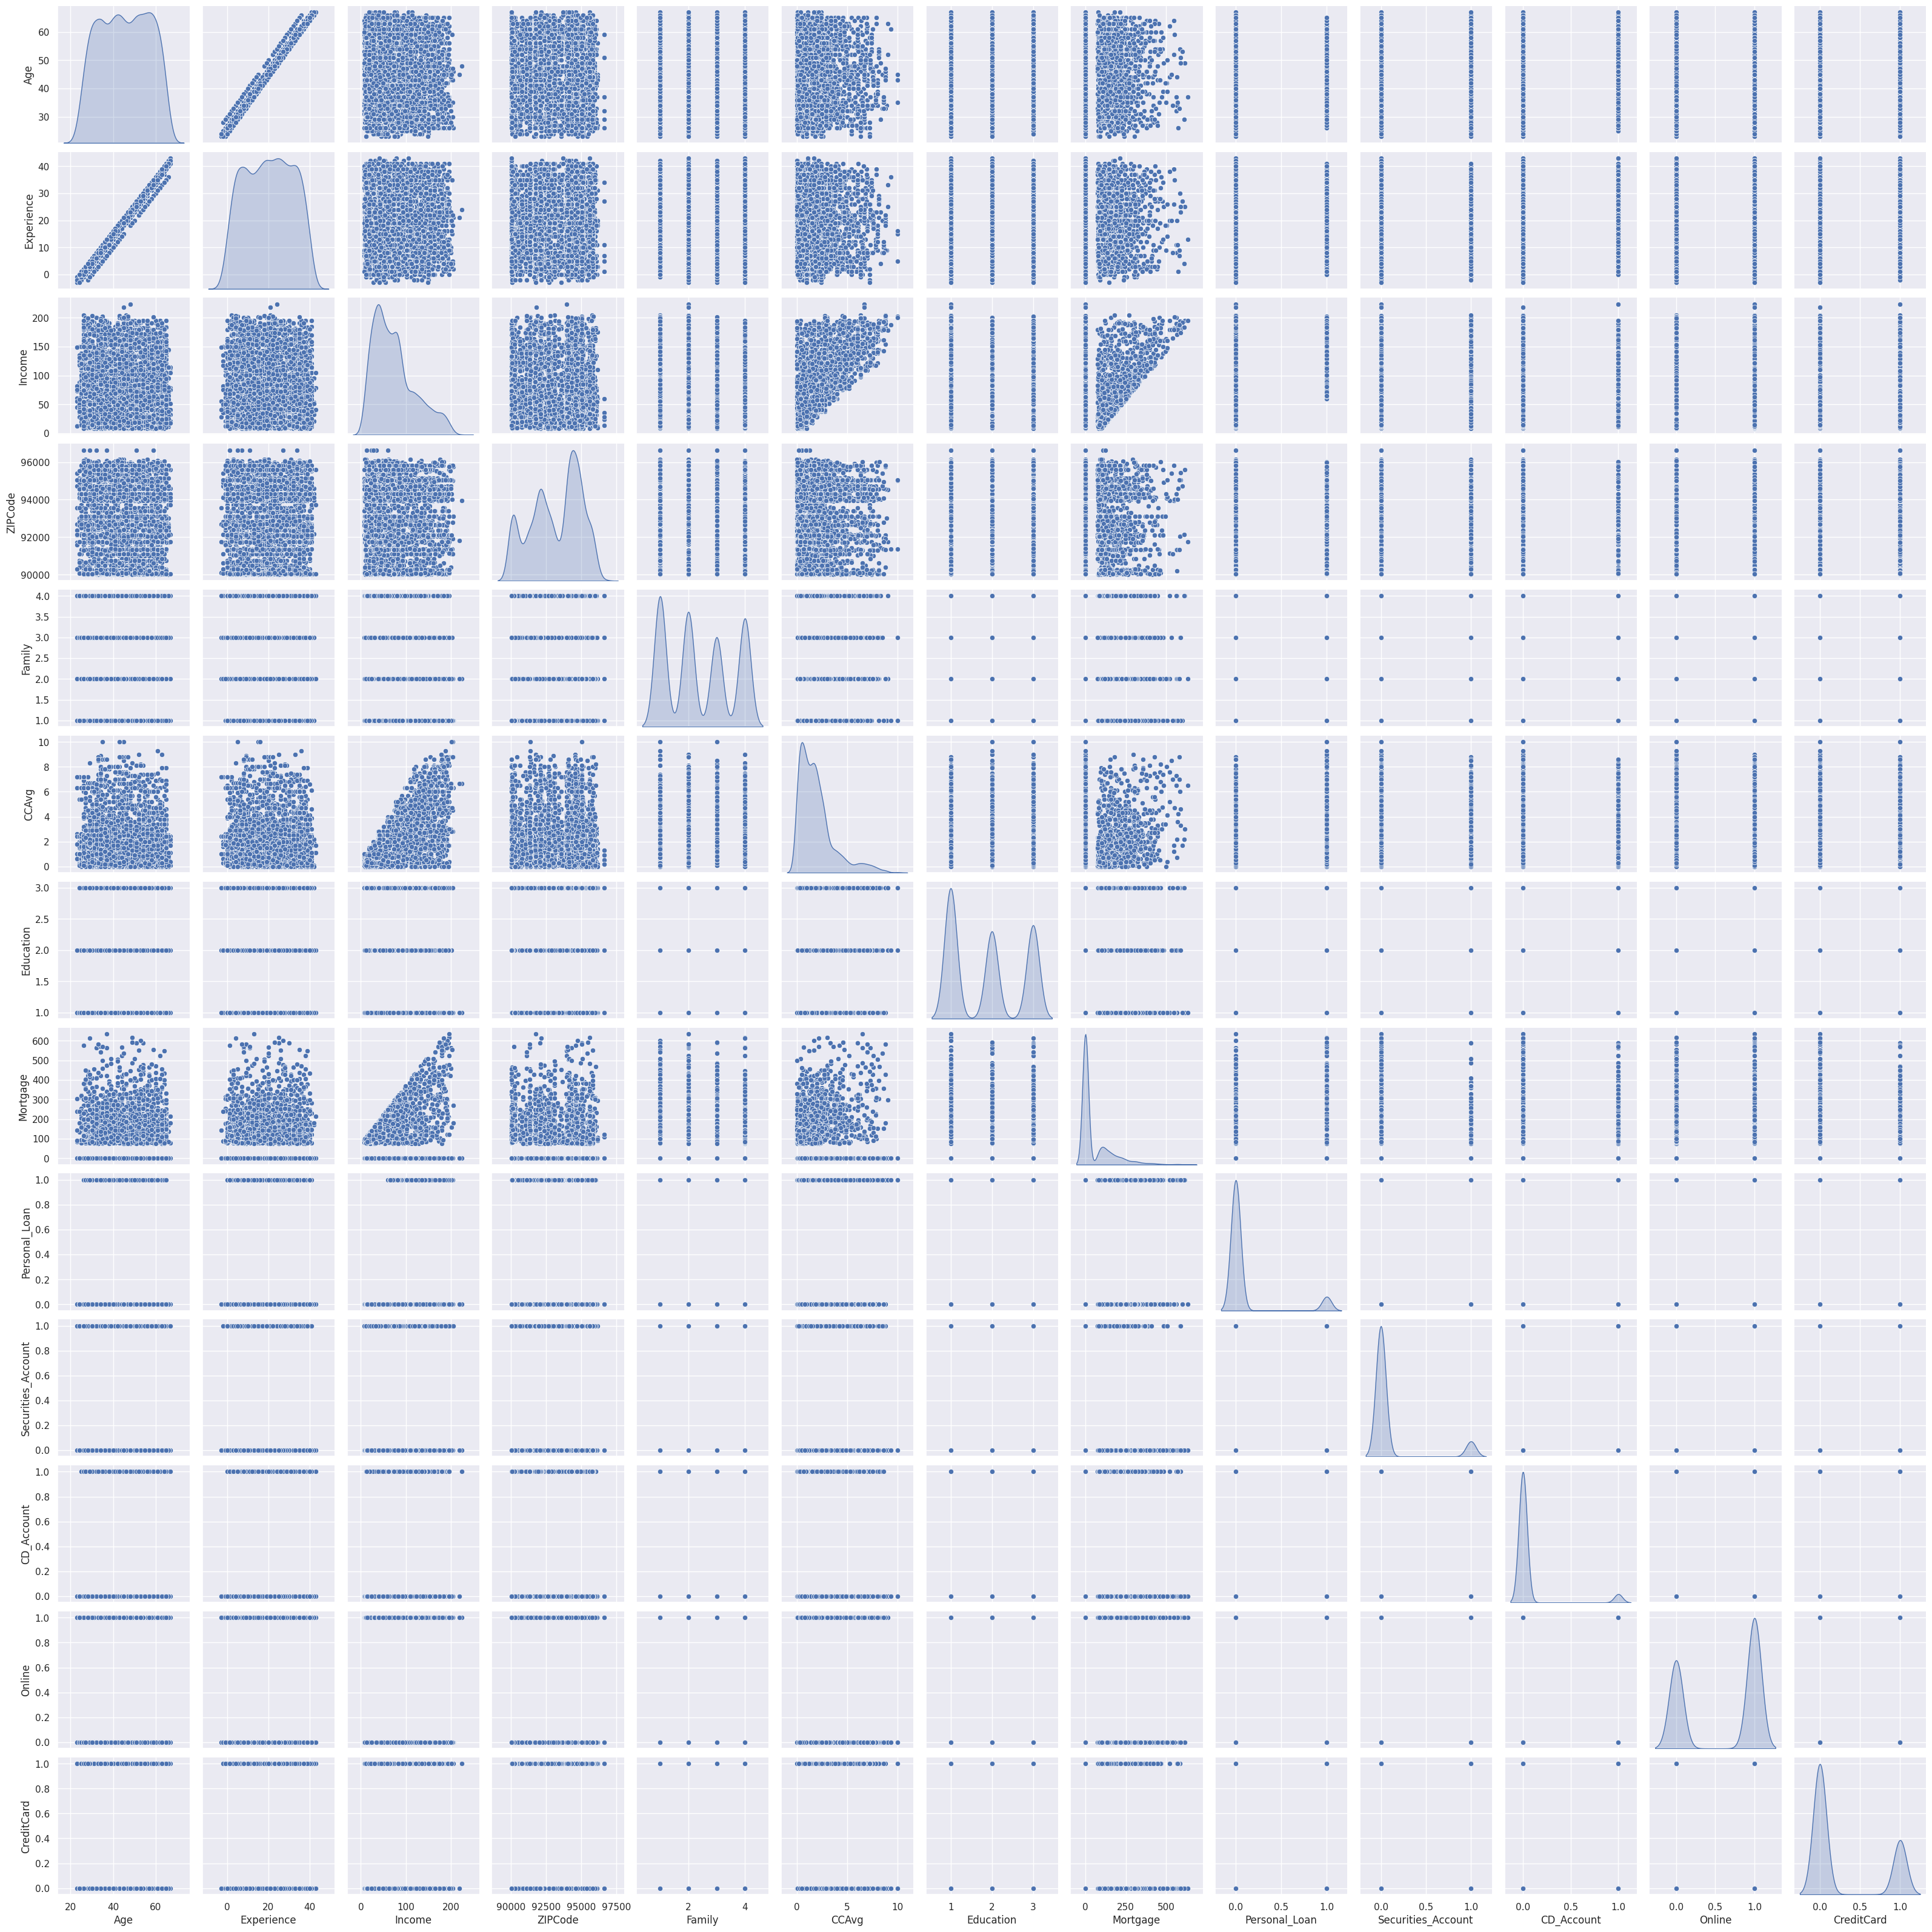

In [379]:
sns.pairplot(data=loan_data, diag_kind="kde")
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [380]:
null_loans = loan_data.isnull().sum()
na_loans = loan_data.isna().sum()
print(null_loans)
print(na_loans)
print(f"There are {loan_data.duplicated().sum()} dupes")


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
There are 0 dupes


In [381]:
if 'ID' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ID'])
if 'ZIPCode' in loan_data.columns:
  loan_data = loan_data.drop(columns=['ZIPCode'])
# copy for custering and Decision Tree
loan_cluster = loan_data.copy()
loan_decision_tree = loan_data.copy()

In [382]:
loan_decision_tree = pd.get_dummies(
    loan_decision_tree,
    columns=["Education"],
    prefix="Education",
    dtype=int
)
X = loan_decision_tree.drop(["Personal_Loan"],axis=1)
Y = loan_decision_tree["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [383]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

FN = Predicting a customer will not accept the personal loan but actually did*
FP = Predicting a customer will accept the personal loan but actually would not.


We care more about FN in this case because we do not want to miss out on business with a customer that would accept the loan offered. We ultimatley want to increase interest revenue.

I will be using a decision tree model to predict customer loan acceptance.

### Model Building

In [384]:
model1 = DecisionTreeClassifier(random_state=1,class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [385]:
model1_prediction = model1.predict(X_train)

Text(0.5, 10.249999999999995, 'Predicted label')

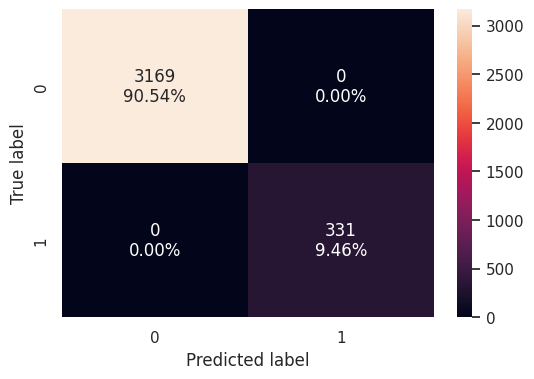

In [386]:
cm = confusion_matrix(y_train, model1_prediction)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [387]:
pred1 = model1.predict(X_train)
acc = accuracy_score(y_train, pred1)
recall = recall_score(y_train, pred1)  # to compute Recall
precision = precision_score(y_train, pred1)  # to compute Precision
f1 = f1_score(y_train, pred1)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model1_train_results = df_pred

Text(0.5, 10.249999999999995, 'Predicted label')

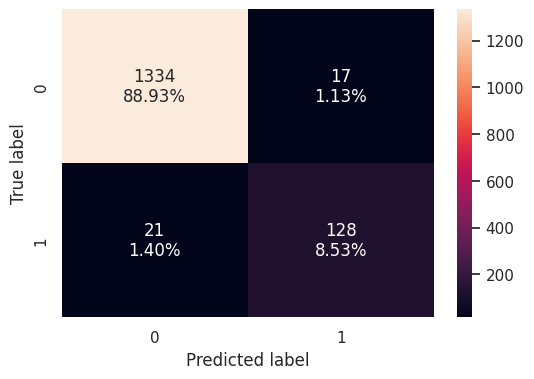

In [388]:
model1_prediction_test = model1.predict(X_test)
cm = confusion_matrix(y_test, model1_prediction_test)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [389]:
pred2 = model1.predict(X_test)
acc = accuracy_score(y_test, pred2)
recall = recall_score(y_test, pred2)  # to compute Recall
precision = precision_score(y_test, pred2)  # to compute Precision
f1 = f1_score(y_test, pred2)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model1_test_results = df_pred

There appears to be noticeable difference in the training set and test set results. Training being perfect always and test being wrong on 2.5% of predictions. The F1 score between the two sets is far off as well so it doesnt handle unseen data as well.

## Model Performance Improvement

Pre prunning.

In [390]:
max_depth_values = [3,4,5,6,7,8,9,10]
max_leaf_nodes_values = [10,15,20,25,30,35,40,45,50,55,60,65,70,75, 120]
min_samples_split_values = [10, 20, 30, 40, 50]
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            estimator.fit(X_train, y_train)
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            score_diff = abs(train_recall_score - test_recall_score)
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 5
Max leaf nodes: 10
Min samples split: 10
Best test recall score: 0.9798657718120806


In [391]:
import pickle

model2 = best_estimator
model2.fit(X_train, y_train)

with open("loan_decision_tree_model.pkl", "wb") as file:
    pickle.dump(model2, file)


<Axes: >

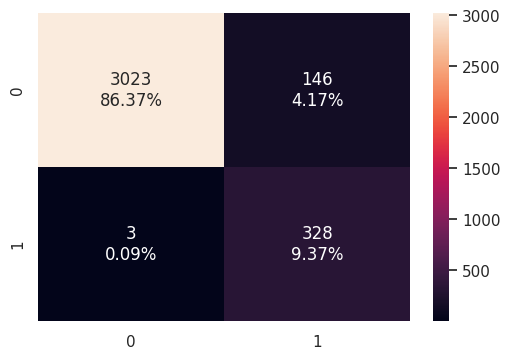

In [392]:
model2_prediction_test = model2.predict(X_train)
cm = confusion_matrix(y_train, model2_prediction_test)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")

In [393]:
pred3 = model2.predict(X_train)
acc = accuracy_score(y_train, pred3)
recall = recall_score(y_train, pred3)
precision = precision_score(y_train, pred3)
f1 = f1_score(y_train, pred3)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model2_train_results = df_pred

Text(0.5, 10.249999999999995, 'Predicted label')

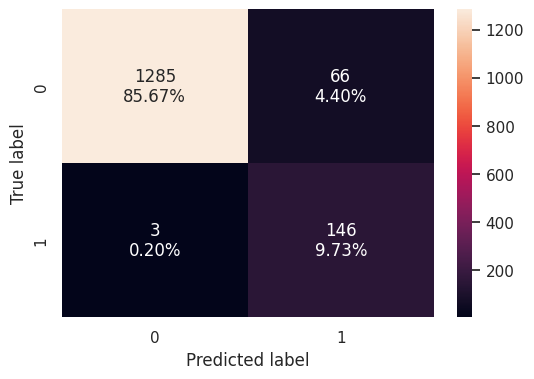

In [394]:
model2_prediction_test = model2.predict(X_test)
cm = confusion_matrix(y_test, model2_prediction_test)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [395]:
pred3 = model2.predict(X_test)
acc = accuracy_score(y_test, pred3)
recall = recall_score(y_test, pred3)  # to compute Recall
precision = precision_score(y_test, pred3)  # to compute Precision
f1 = f1_score(y_test, pred3)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model2_test_results = df_pred

The model scores well between the train and test data they are very close. It does well on unseen data like test.

In [396]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

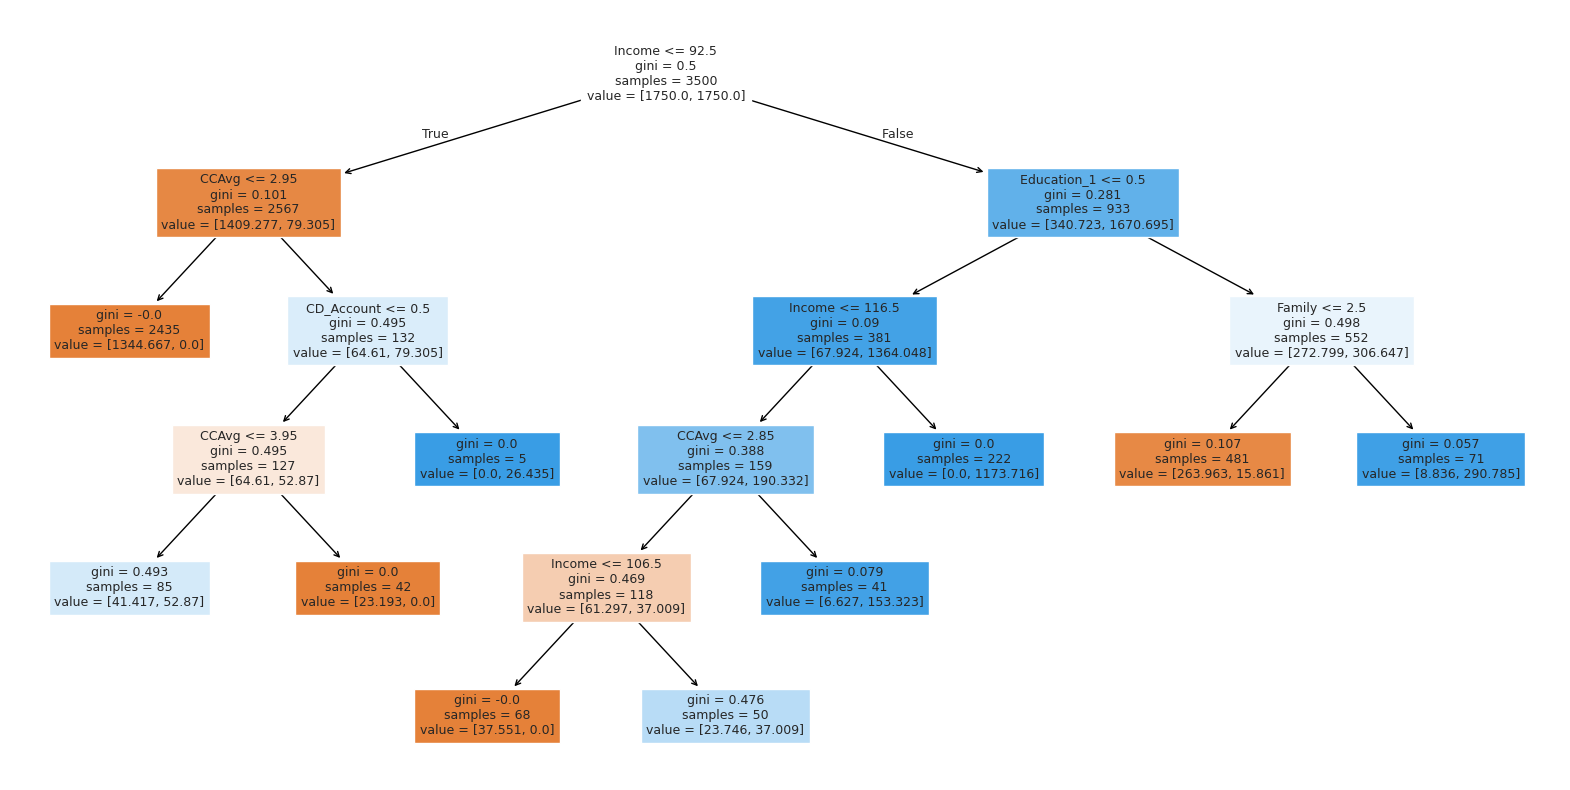

In [397]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

The model starts with income which makes sense given income had the highest correlation to personal_loan

In [398]:
importances = model2.feature_importances_

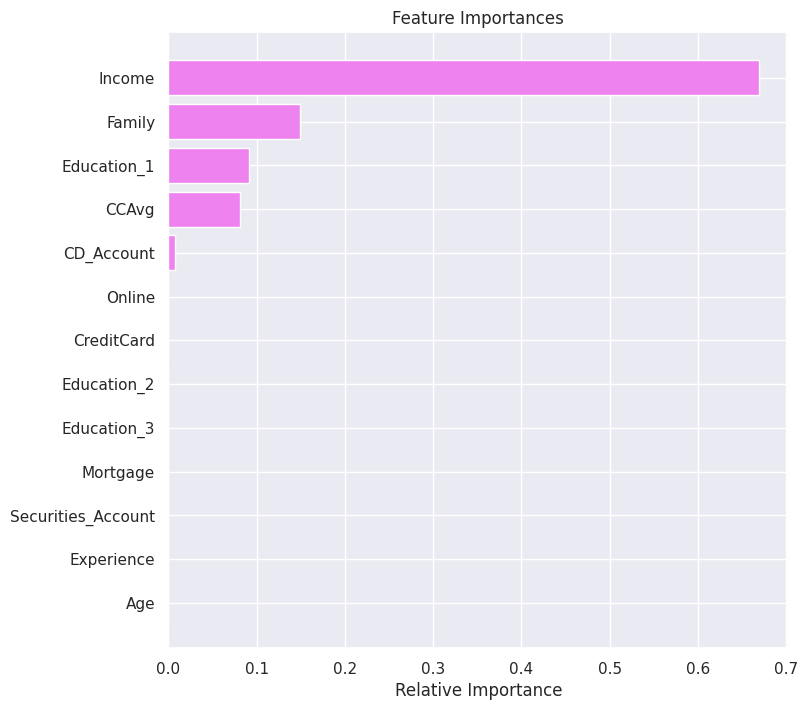

In [399]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



Post Pruning


In [400]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

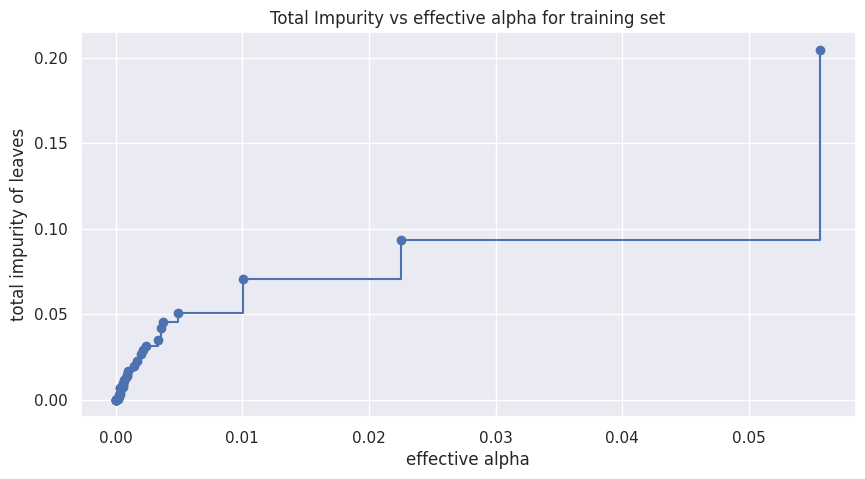

In [401]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [402]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992322


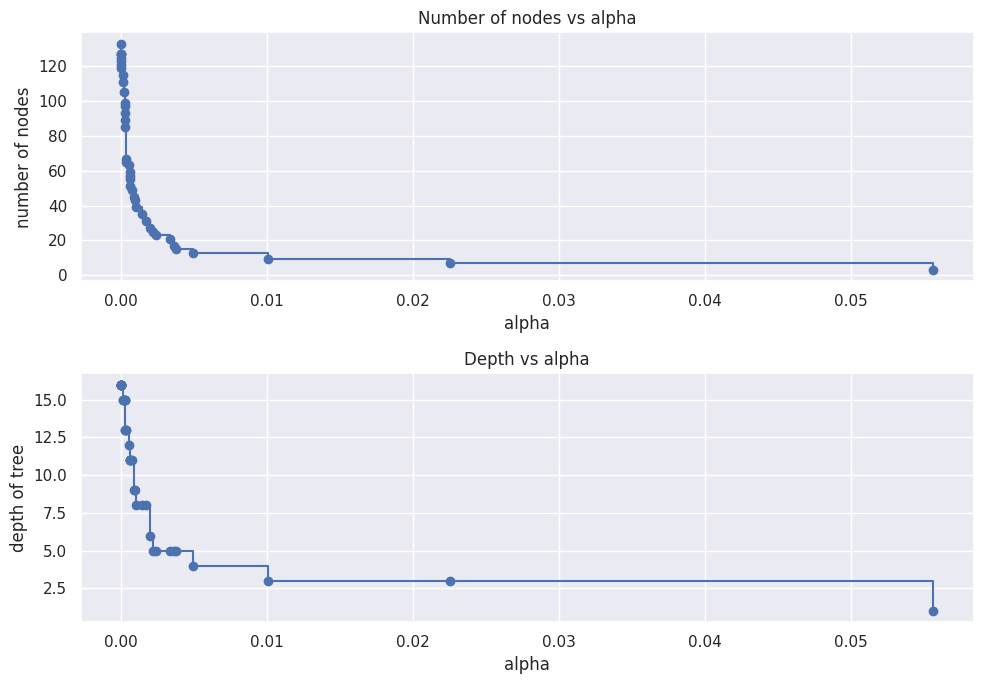

In [403]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [404]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [405]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [406]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

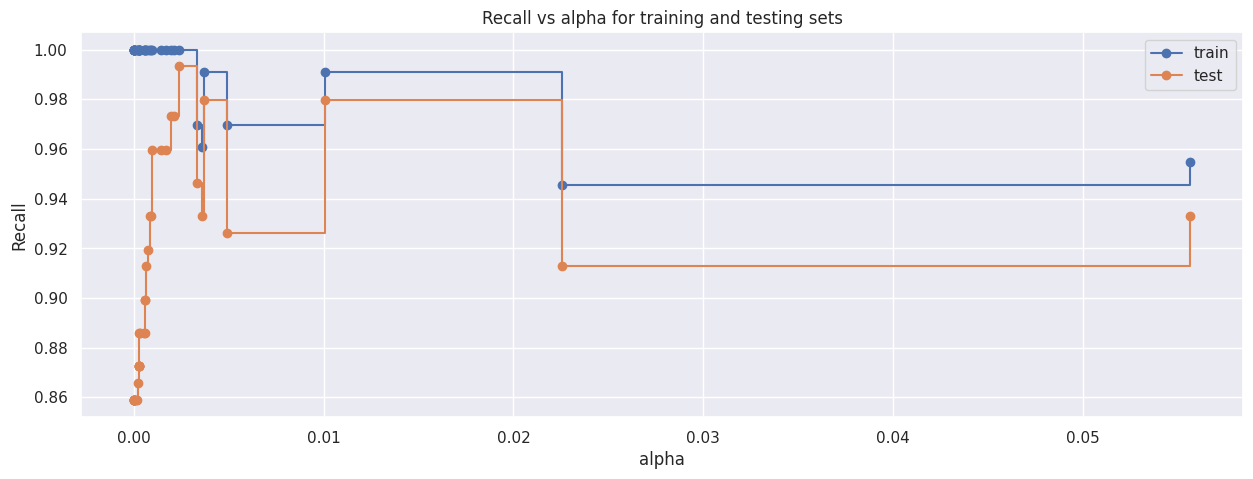

In [407]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [408]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002375808619774645),
                       class_weight='balanced', random_state=1)


In [409]:
model3 = best_model

Text(0.5, 10.249999999999995, 'Predicted label')

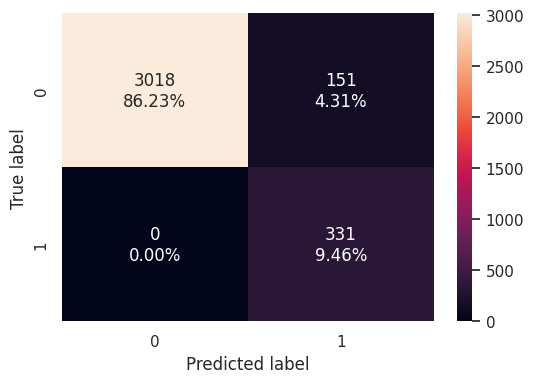

In [410]:
model3_prediction_test = model3.predict(X_train)
cm = confusion_matrix(y_train, model3_prediction_test)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [411]:
pred4 = model3.predict(X_train)
acc = accuracy_score(y_train, pred4)
recall = recall_score(y_train, pred4)  # to compute Recall
precision = precision_score(y_train, pred4)  # to compute Precision
f1 = f1_score(y_train, pred4)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model3_train_results = df_pred

Text(0.5, 10.249999999999995, 'Predicted label')

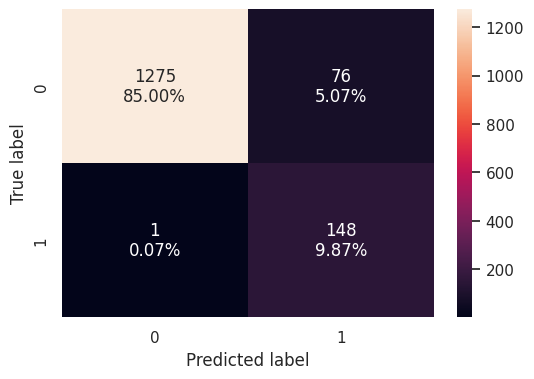

In [412]:
model3_prediction_test = model3.predict(X_test)
cm = confusion_matrix(y_test, model3_prediction_test)
labels = np.asarray(
    [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [413]:
pred5 = model3.predict(X_test)
acc = accuracy_score(y_test, pred5)
recall = recall_score(y_test, pred5)  # to compute Recall
precision = precision_score(y_test, pred5)  # to compute Precision
f1 = f1_score(y_test, pred5)
df_pred = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
df_model3_test_results = df_pred

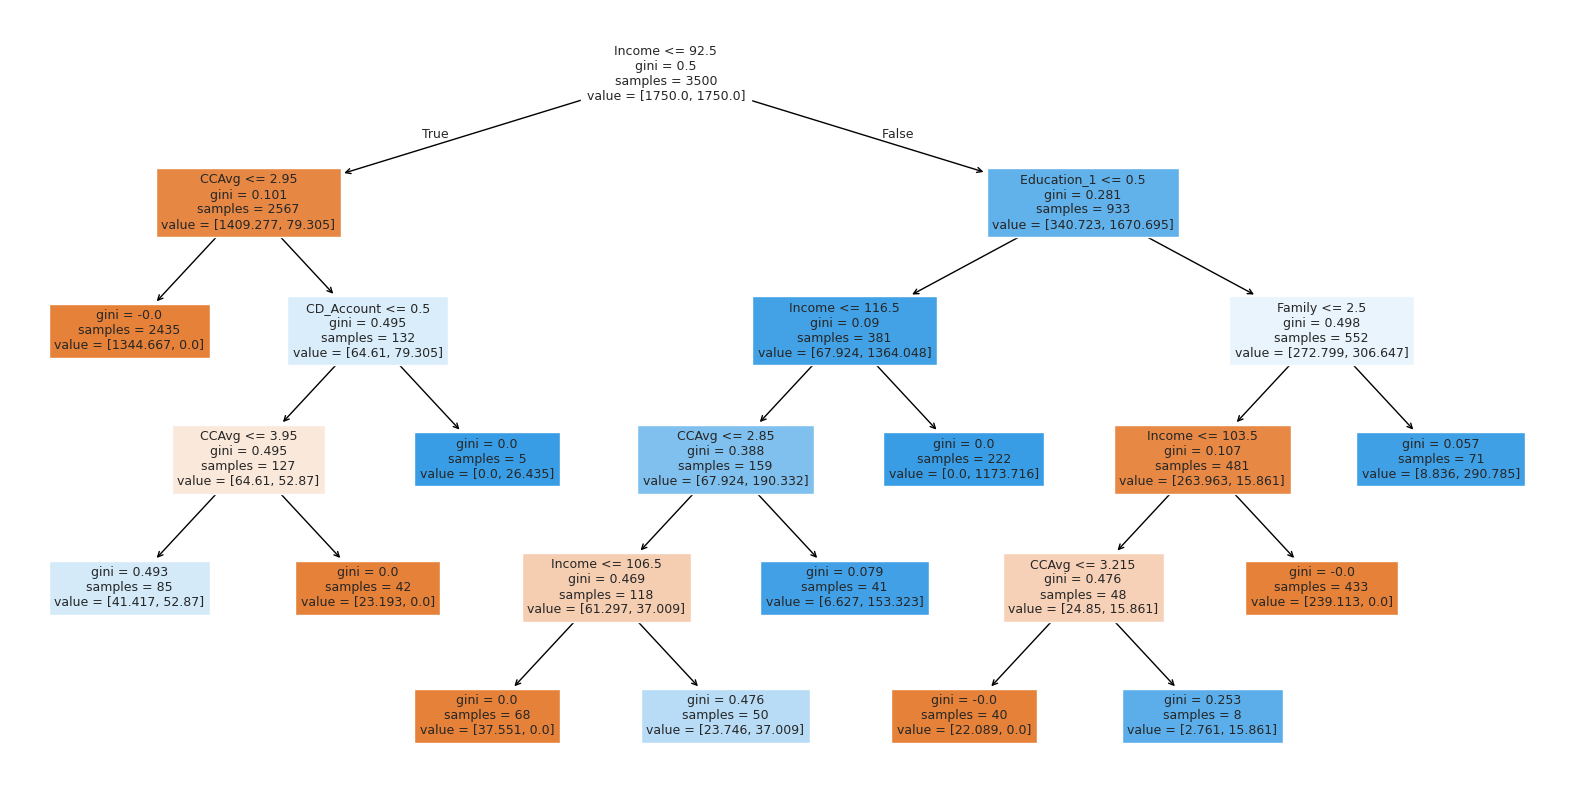

In [414]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [415]:
importances = model3.feature_importances_
indices = np.argsort(importances)

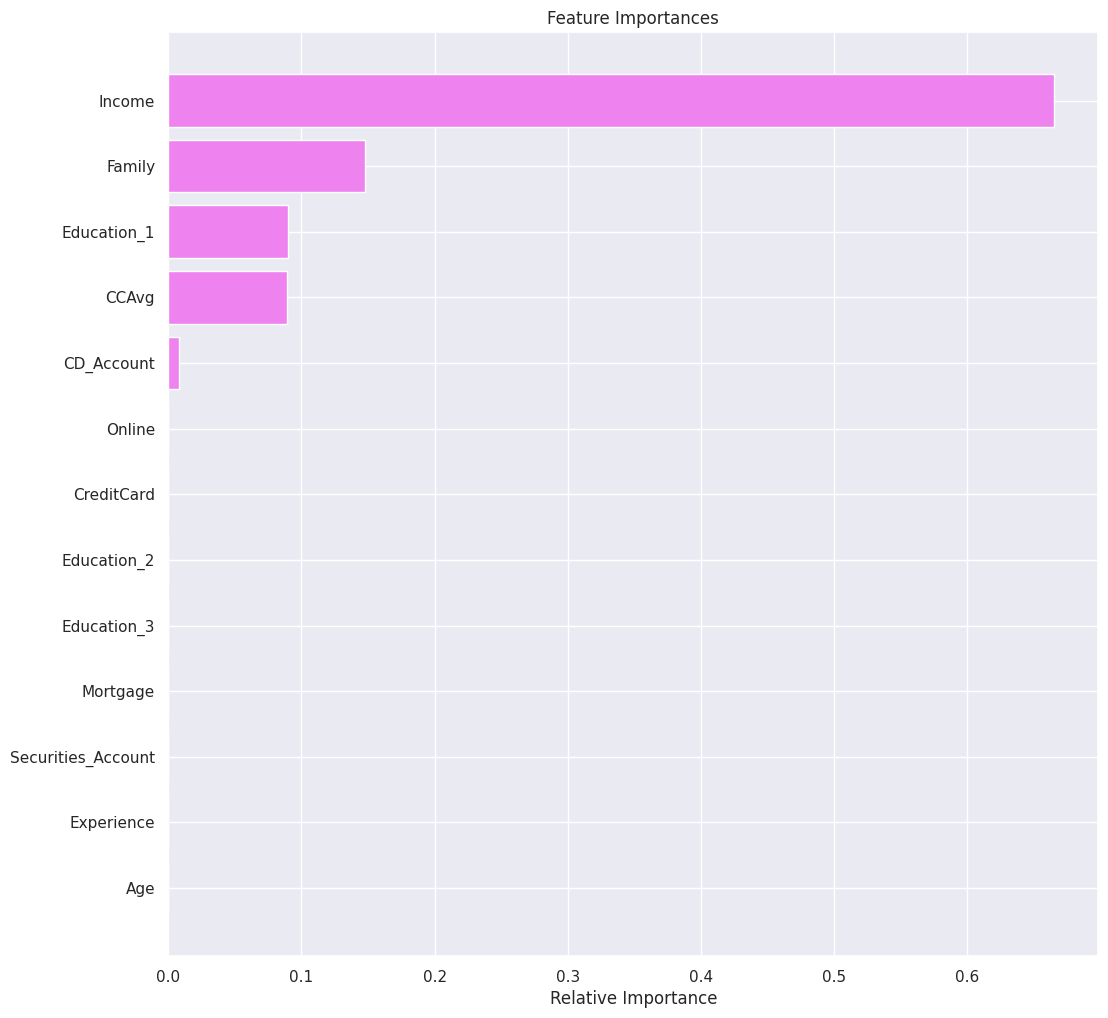

In [416]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

After using both the pre pruning and post pruning approach I like the results of my prepuned model better than post pruning. I think it has the appropriate amount of hyper parameters and the post pruned version tries to extend them a little too far. The pre pruned model also scores better on recall, percision, accuracy and F1 score.

In [418]:
models_train_comp_df = pd.concat(
    [
        df_model1_train_results.T,
        df_model2_train_results.T,
        df_model3_train_results.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.957429   
Recall                                 1.0                     0.990937   
Precision                              1.0                     0.691983   
F1                                     1.0                     0.814907   

           Decision Tree (Post-Pruning)  
Accuracy                       0.956857  
Recall                         1.000000  
Precision                      0.686722  
F1                             0.814268  


In [419]:
models_test_comp_df = pd.concat(
    [
        df_model1_test_results.T,
        df_model2_test_results.T,
        df_model3_test_results.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
print(models_test_comp_df)

Training performance comparison:
           Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.974667                     0.954000   
Recall                            0.859060                     0.979866   
Precision                         0.882759                     0.688679   
F1                                0.870748                     0.808864   

           Decision Tree (Post-Pruning)  
Accuracy                       0.948667  
Recall                         0.993289  
Precision                      0.660714  
F1                             0.793566  


The model that was tuned with pre pruning yielded better scores than the post pruned model. The F1 scores between the train and test are very close indicating the pre pruned model will be better at predicting unseen data.

The pre prunned model can predict close to 98% of personal loan acceptance for customer. It also did better with recall than the default model which was very important to reduce false negatives. The biggest downside to the pre pruned model was its percision. It was not as good at predicting loan acceptance.

The post prunned model is good. But its performance does not match the preprunned with a worse f1 and percision score and just slightly better recall but has a lower accuracy to the preprunned.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

We will use the pre-pruned decision tree for predictions because it provides the best balance of performance and generalization. It has a high recall, meaning it correctly identifies nearly all customers who would accept a loan and reduces false negatives.

We want to go with the model with better recall which is critical because not offering a customer a personal loan is worse than offereing them one and them not taking it. Although precision is lower, offering a loan to someone who declines is less costly than failing to offer one to someone who would have accepted.

**EXTRA ANALYSIS**

**Attempt to Cluster Customers**

In [ ]:
scaler = StandardScaler()
loan_cluster_scaled = scaler.fit_transform(loan_cluster)

In [ ]:
loan_cluster_scaled_df = pd.DataFrame(loan_cluster_scaled,columns=loan_cluster.columns)

In [ ]:
tsne = TSNE(n_components=2, n_jobs=-2, random_state=0, perplexity=50)
tsne_reduced_data = tsne.fit_transform(loan_cluster_scaled_df)
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"]))

In [ ]:
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

In [ ]:
tsne = TSNE(n_components=3, n_jobs=-2, random_state=0, perplexity=50)
tsne_reduced_data = tsne.fit_transform(loan_cluster_scaled_df)
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"]))

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

In [ ]:
k_means_df = loan_cluster_scaled_df.copy()

In [ ]:
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(loan_cluster_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

In [ ]:
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict((loan_cluster_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(k_means_df)

In [ ]:
# creating a copy of the original data
df1 = data.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # scaled
df1["K_means_segments"] = kmeans.labels_    # original
tsne_2d_data["K_means_segments"] = kmeans.labels_    # t-SNE 2D
tsne_3d_data["K_means_segments"] = kmeans.labels_    # t-SNE 3D

In [ ]:
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()